In [38]:
%matplotlib inline
from sklearn.cross_validation import train_test_split
from keras.utils.np_utils import to_categorical
import pandas as pd
import numpy as np

In [65]:
# prepare dataset
train = pd.read_csv( "kaggle/train.csv", header=0 )
print( train.shape )

(3751, 1777)


In [86]:
Y = train.Activity
X = train.ix[:,1:]
train_X, test_X, train_Y, test_Y = train_test_split( X, Y, test_size=0.3, random_state=123 )
train_X, test_X = np.asanyarray( train_X ), np.asanyarray( test_X )
train_Y, test_Y = np.asanyarray( train_Y ), np.asanyarray( test_Y )

print( train_X.shape )
print( train_Y.shape, set( train_Y ) )

(2625, 1776)
(2625,) {0, 1}


In [87]:
# 空のモデルオブジェクトを生成
from keras.models import Sequential
model = Sequential()

In [88]:
# レイヤーは.addで追加して構成する
# 活性化関数や、隠れ層の設定で結果がだいぶ変わる
# 活性化関数 relu, softmax, sigmoid, tanh
from keras.layers import Dense, Activation
# 一層目の追加と活性化関数の定義
model.add( Dense( output_dim=100, input_dim=1776 ) )
model.add( Activation( "relu" ) )
model.add( Dense( output_dim=2 ) )
model.add( Activation( "softmax" ) )

In [89]:
# モデルの生成はcompileで行う。
model.compile( optimizer="sgd",
               loss="sparse_categorical_crossentropy",
               metrics = ["accuracy"] )

In [90]:
hist = model.fit( np.asanyarray(train_X), train_Y, nb_epoch=20, batch_size=100 )

Epoch 1/20
2625/2625 [==============================] - 0s - loss: 0.7046 - acc: 0.5128     
Epoch 2/20
2625/2625 [==============================] - 0s - loss: 0.6748 - acc: 0.5752     
Epoch 3/20
2625/2625 [==============================] - 0s - loss: 0.6516 - acc: 0.6324     
Epoch 4/20
2625/2625 [==============================] - 0s - loss: 0.6338 - acc: 0.6552     
Epoch 5/20
2625/2625 [==============================] - 0s - loss: 0.6186 - acc: 0.6804     
Epoch 6/20
2625/2625 [==============================] - 0s - loss: 0.6049 - acc: 0.6861     
Epoch 7/20
2625/2625 [==============================] - 0s - loss: 0.5921 - acc: 0.6987     
Epoch 8/20
2625/2625 [==============================] - 0s - loss: 0.5812 - acc: 0.7105     
Epoch 9/20
2625/2625 [==============================] - 0s - loss: 0.5703 - acc: 0.7166     
Epoch 10/20
2625/2625 [==============================] - 0s - loss: 0.5614 - acc: 0.7227     
Epoch 11/20
2625/2625 [==============================] - 0s - loss: 0

In [91]:
#　学習させたモデルで予測してみる
pred_Y = model.predict_classes( test_X )

 992/1126 [=========================>....] - ETA: 0s

In [92]:
pred_Y

array([1, 0, 0, ..., 1, 0, 0])

In [93]:
from sklearn.metrics import confusion_matrix, classification_report

In [94]:
confusion_matrix( test_Y, pred_Y )

array([[372, 142],
       [149, 463]])

In [95]:
print( classification_report( test_Y, pred_Y ))

             precision    recall  f1-score   support

          0       0.71      0.72      0.72       514
          1       0.77      0.76      0.76       612

avg / total       0.74      0.74      0.74      1126



In [96]:
loss = hist.history[ "loss" ]
acc = hist.history[ "acc" ]

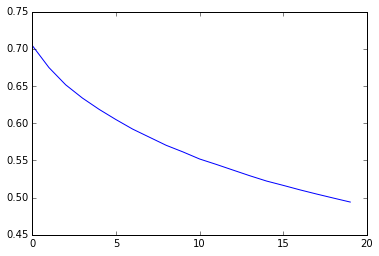

In [97]:
# 学習の過程はヒストリとして保存されているのでかしかしてみる。
import matplotlib.pyplot as plt
plt.plot( range( len( loss ) ), loss, label = "loss" )

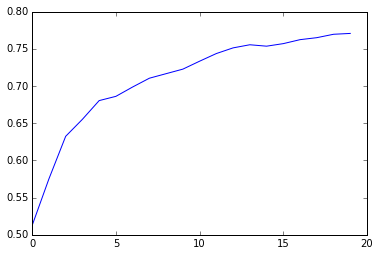

In [98]:
plt.plot( range( len( acc ) ), acc, label = "acc" )

In [99]:
# SVCはどうでしょう？
from sklearn.svm import SVC
svc = SVC()

In [100]:
svc.fit( train_X, train_Y )

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [101]:
svc_pred_Y = svc.predict( test_X )

In [102]:
confusion_matrix( test_Y, svc_pred_Y )

array([[345, 169],
       [151, 461]])

In [103]:
# DNNがちょっとよい
print( classification_report( test_Y, svc_pred_Y ) )

             precision    recall  f1-score   support

          0       0.70      0.67      0.68       514
          1       0.73      0.75      0.74       612

avg / total       0.72      0.72      0.72      1126



1.0